## DM2 DMC | Facebook Prophet Baselines: A Single Model for each Item

Let's just use the sales numbers of each single item to produce a very basic forecast.

### Imports

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import logging
import csv
import pickle

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

### Settings

In [3]:
read_write_prophet_forecasts = 'r'

In [4]:
read_write_prophet_fitted_models = 'r'

### Directories

In [5]:
input_file = 'C:/Users/JulianWeller/Desktop/2018_04_23_a_DM2_DMC_FB_Prophet_Date_Item.xlsx'

In [6]:
test_data_directory = 'C:/Users/JulianWeller/OneDrive - Julian Weller/01_MMDS/03_Semester/04_A_6_Data Mining II/03_DMC/02_Test_Data/DMC_2018_test/'

In [7]:
dump_directory = 'C:/Users/JulianWeller/Desktop/DM2_DMC_Working_Directory/'

### Loading the Data

In [8]:
df = pd.read_excel(input_file)

Let's split into train and test data (test data is not used, as there is test data provided by the chair):

In [9]:
df_train = df.drop(df.tail(31).index)

In [10]:
df_train.tail()

,ds,10000XL ( 158-170 ),10001L,100033 (35-38 ),100034 ( 39-42 ),100035 ( 43-46 ),10006XL,10008XL,10013L,10013M,...,2286946,2286947,"2286947,5",22872M ( 140-152 ),22873L,228782XL,22878L,22878M,22878XL,22881S
87,2017-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
88,2017-12-28,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,10,30,10,20,0
89,2017-12-29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,2017-12-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,2017-12-31,0,0,0,0,0,0,0,0,0,...,0,0,0,30,0,0,0,0,0,10


Not used, but here's the January data:

In [11]:
df_test = df.drop(df.head(92).index)

In [12]:
df_test.head()

,ds,10000XL ( 158-170 ),10001L,100033 (35-38 ),100034 ( 39-42 ),100035 ( 43-46 ),10006XL,10008XL,10013L,10013M,...,2286946,2286947,"2286947,5",22872M ( 140-152 ),22873L,228782XL,22878L,22878M,22878XL,22881S
92,2018-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,0,0
93,2018-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,10
94,2018-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,2018-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2018-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's create that 'ds' column FB prophet always needs:

In [13]:
df_ds = df_train.iloc[:,[0]]

In [14]:
df_ds.head()

,ds
0,2017-10-01
1,2017-10-02
2,2017-10-03
3,2017-10-04
4,2017-10-05


Let's create a list of dataframes where each such dataframe contains a 'ds' and a 'y' column so that we can easily give it to the prophet and ask for predictions:

In [15]:
list_of_dataframes = []

And let's keep track of the item keys:

In [16]:
list_of_item_keys = []

In [17]:
for i in range(1, 12825):
    df_to_be_appended = df_ds.join(df_train.iloc[:,[i]])
    
    list_of_item_keys.append(df_to_be_appended.columns[1])
    
    df_to_be_appended.columns = ['ds', 'y']
    
    list_of_dataframes.append(df_to_be_appended)

Here's an example of a list entry:

In [18]:
list_of_item_keys[6]

'10008XL'

In [19]:
list_of_dataframes[6].head()

,ds,y
0,2017-10-01,0
1,2017-10-02,0
2,2017-10-03,0
3,2017-10-04,0
4,2017-10-05,0


The prophet may shut up while propheting:

In [20]:
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

A list with the prophet's fitted models:

In [21]:
prophet_fitted_models = []

In [22]:
if read_write_prophet_fitted_models == 'w':
    for i in list_of_dataframes:
        prophet_fitted_models.append(Prophet().fit(i))

In [23]:
if read_write_prophet_fitted_models == 'w':
    with open(dump_directory + "prophet_fitted_models", "wb") as fp:
        pickle.dump(prophet_fitted_models, fp)

In [24]:
if read_write_prophet_fitted_models == 'r':
    with open(dump_directory + "prophet_fitted_models", "rb") as fp:
        prophet_fitted_models = pickle.load(fp)

And another one with the prophet's forecasts:

In [25]:
prophet_forecasts = []

In [26]:
if read_write_prophet_forecasts == 'w':
    for i in prophet_fitted_models:
        prophet_forecasts.append(i.predict(i.make_future_dataframe(periods=31))[['ds', 'yhat']].drop(forecast.head(92).index))

In [27]:
if read_write_prophet_forecasts == 'w':
    with open(dump_directory + "prophet_forecasts", "wb") as fp:
        pickle.dump(prophet_forecasts, fp)

In [28]:
if read_write_prophet_forecasts == 'r':
    with open(dump_directory + "prophet_forecasts", "rb") as fp:
        prophet_forecasts = pickle.load(fp)

Let's look at an example:

In [29]:
list_of_item_keys[6]

'10008XL'

In [30]:
prophet_forecasts[6].head()

,ds,yhat
92,2018-01-01,0.803619
93,2018-01-02,0.039785
94,2018-01-03,0.040921
95,2018-01-04,0.807022
96,2018-01-05,0.043319


### Loading the Test Data from the Chair

In [31]:
test_data = []

In [32]:
for i in range(0, 5):
    df = pd.read_csv(test_data_directory + 'test_' + str(i) + '.csv', dtype={'pid': int})
    
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    ################################
    # Taken from Basil: datamining2/data/datasets_Basil/create_dataset_v0.3.ipynb
    #Creating key for train dataset
    keys3=[]
    i=0
    while i<len(df):
        key=str(df.iloc[i,0]) + str(df.iloc[i,1])
        keys3.append(key)
        i=i+1
        
    df['key']=keys3
    ################################
    
    df.drop(df.columns[0], axis=1, inplace=True)
    df.drop(df.columns[0], axis=1, inplace=True)
    
    df['soldout_day'] = df['sold_out_date'].str[-2:]
    
    df.soldout_day = pd.to_numeric(df.soldout_day, errors='coerce')
    
    df.drop(df.columns[1], axis=1, inplace=True)
    
    test_data.append(df)

In [33]:
test_data[0].head()

,stock,key,soldout_day
0,1.0,10001L,7
1,1.0,100035 ( 43-46 ),30
2,4.0,10008XL,30
3,1.0,10013L,24
4,1.0,10013M,22


Here's an example of how the data in the dataframes can be accessed:

In [34]:
list_of_item_keys[6]

'10008XL'

In [35]:
test_data[0].loc[df['key'] == list_of_item_keys[6]].iloc[0]['stock']

4.0

In [36]:
test_data[0].loc[df['key'] == list_of_item_keys[6]].iloc[0]['soldout_day']

30

### Evaluation

In [37]:
################################
# Taken from Chung: datamining2/measures/objectives.py
def soldout_day(pred, stock):
    """
    Calculates first day that stock hits 0 in a certain month for an item
    :param pred: Array of predicted sales units for an item
    :param stock: Stock at beginning of month for an item
    :return: Day of month that stock reaches 0
    """
    soldout_day = len(pred)
    for day in range(len(pred)):
        stock -= pred[day]
        #print(stock)
        if stock <= 0:
            soldout_day = day+1
            break
    return soldout_day
################################

In [38]:
prophet_forecasts_sold_out_days = []

In [39]:
test_data_sold_out_days = []

In [40]:
list_of_item_keys_test = []

In [41]:
for j in test_data:
    
    j_key_set = set(j['key'].tolist())
    
    prophet_forecasts_sold_out_days_test = []
    test_data_sold_out_days_test = []
    list_of_item_keys_test_test = []
    
    for idx, val in enumerate(prophet_forecasts):
        item_key = list_of_item_keys[idx]
        if item_key in j_key_set:
            prophet_forecasts_sold_out_days_test.append(soldout_day(val['yhat'].tolist(), j.loc[df['key'] == item_key].iloc[0]['stock']))
            test_data_sold_out_days_test.append(j.loc[df['key'] == item_key].iloc[0]['soldout_day'])
            list_of_item_keys_test_test.append(item_key)
                             
    prophet_forecasts_sold_out_days.append(prophet_forecasts_sold_out_days_test)
    test_data_sold_out_days.append(test_data_sold_out_days_test)
    list_of_item_keys_test.append(list_of_item_keys_test_test)

Here's some explanation:

These lengths are five, because there are five test sets:

In [42]:
len(prophet_forecasts_sold_out_days)

5

In [43]:
len(test_data_sold_out_days)

5

In [44]:
len(list_of_item_keys_test)

5

These lengths are 8142, because that's the number of items included in the test data provided by the chair. There are five of them, because there are five test sets.

In [45]:
print([len(i) for i in prophet_forecasts_sold_out_days])

[8142, 8142, 8142, 8142, 8142]


In [46]:
print([len(i) for i in test_data_sold_out_days])

[8142, 8142, 8142, 8142, 8142]


In [47]:
print([len(i) for i in list_of_item_keys_test])

[8142, 8142, 8142, 8142, 8142]


Let's calculate the square root of the sum of absolute deviations of predicted sold-out-day and true sold-out-day for all the 8142 items for each of the test sets:

In [48]:
sqrt_sum_abs_difference_sold_out_days = []

In [49]:
for pred, true in zip(prophet_forecasts_sold_out_days, test_data_sold_out_days):
    # Credits to Chung for the abs_sales_diff function from which I borrow here
    sqrt_sum_abs_difference_sold_out_days.append(np.sqrt(sum([abs(pred[i] - true[i]) for i in range(len(pred))])))

Here we have the test scores for each of the five test sets:

In [50]:
sqrt_sum_abs_difference_sold_out_days

[322.4546479739438,
 321.95807180438885,
 322.5151159248199,
 322.25145461269835,
 321.681519518918]

And as asked for, the average and the standard deviation:

In [51]:
np.average(sqrt_sum_abs_difference_sold_out_days)

322.1721619669538

In [52]:
np.std(sqrt_sum_abs_difference_sold_out_days)

0.3131350170619725

### Analysis of Results

Let's have a closer look at the results for the items for each of the test sets:

In [53]:
list_of_dfs_of_evaluation_results_for_test_sets = []

In [54]:
for i in range(0, 5):
    df_to_be_appended = pd.DataFrame({'key': list_of_item_keys_test[i], 'pred': prophet_forecasts_sold_out_days[i], 'true': test_data_sold_out_days[i]})
    
    df_to_be_appended['abs_dev'] = abs(df_to_be_appended['pred'] - df_to_be_appended['true'])
    
    list_of_dfs_of_evaluation_results_for_test_sets.append(df_to_be_appended)

In [55]:
list_of_dfs_of_evaluation_results_for_test_sets[0].head()

,key,pred,true,abs_dev
0,10001L,6,7,1
1,100035 ( 43-46 ),1,30,29
2,10008XL,15,30,15
3,10013L,31,24,7
4,10013M,3,22,19


In [56]:
list_of_dfs_of_evaluation_results_for_test_sets[0].describe()

,pred,true,abs_dev
count,8142.000000,8142.000000,8142.00000
mean,10.630312,16.986121,12.77045
std,12.745471,9.513181,9.00440
min,1.000000,1.000000,0.00000
25%,2.000000,9.000000,5.00000
50%,3.000000,17.000000,12.00000
75%,31.000000,25.000000,20.00000
max,31.000000,31.000000,30.00000


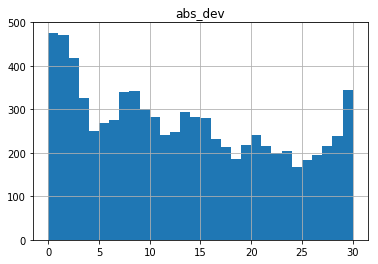

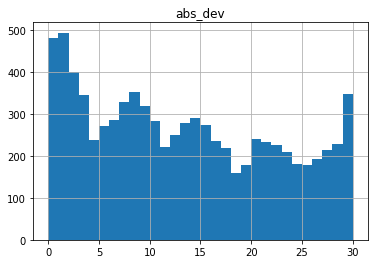

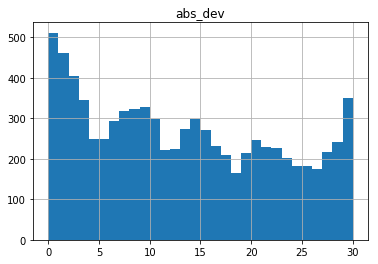

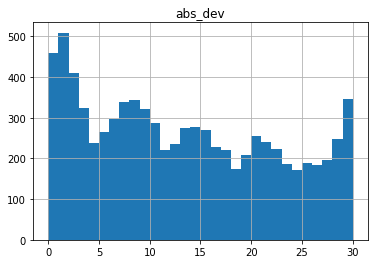

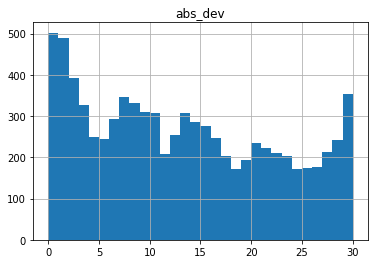

In [57]:
for i in list_of_dfs_of_evaluation_results_for_test_sets:
    plt.show(i.hist(column='abs_dev', bins=30))